**We start with uploading data:**

The data describes the real passengers of Titanic (train.csv) - their age, gender etc and the test ones, which we will analyse using the first ones.

This notebook focuses on clustering - exploration of different models.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
train = pd.read_csv('/content/drive/MyDrive/datasets/train.csv')
test = pd.read_csv('/content/drive/MyDrive/datasets/test.csv')
train.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


**Now we have to prepare data:**

1) We will represent gener with 0 (male) and 1 (female)

2) For Age and Fare columns, the NaN values we'll change to the median, while for the Embarkedn we'll use mode.

In [ ]:
#SEX

train.loc[train['Sex'] == 'male', 'Sex'] = 0
train.loc[train['Sex'] == 'female', 'Sex'] = 1

test.loc[test['Sex'] == 'male', 'Sex'] = 0
test.loc[test['Sex'] == 'female', 'Sex'] = 1

#AGE

train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

#FARE

train['Fare'] = train['Fare'].fillna(train['Fare'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

#EMBARKED

train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode())
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode())

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,S


StandardScaler and clustering can only work with numbers, not strings. Therefore we have to also **one-hot encode Embarked**.

In [ ]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S,Embarked_C
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,1,0
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,NaN,Q,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,0,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,0,1,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,0,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,0,0,1


In [ ]:
test['Embarked_Q'] = (test['Embarked'] == 'Q').astype(int)
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S,Embarked_C
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,1,0,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,0,1,0
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,S,0,1,0
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,Q,1,0,0
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,S,0,1,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,C,0,0,1
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,S,0,1,0


**Now we select features:**

I decided on Pclass, Sex, Age, SibSp, Parch, Fare, Embarked. This is a mix of social class, demographics, family, wealth, personal information.

In [ ]:
X = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S', 'Embarked_C']]

Clustering uses distance and therefore **scaling is crucial** for this data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Now we can move on to clustering. Let's focus on several algorithms:

I'd like to start with the basic one - **K-means**.

According to the Scikit-learn documentation:

*The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large numbers of samples and has been used across a large range of application areas in many different fields.*

At first, let's find the number of clusters:

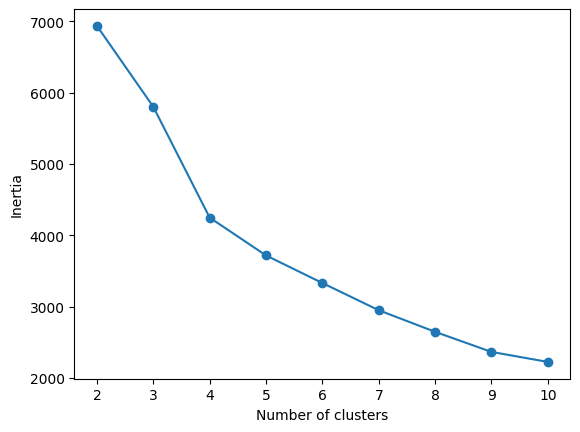

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

The lack of extremum means that data does not have a single “natural” number of clusters. Titanic passengers form a continuum of social/demographic differences, not clean blobs. In this case it is better to choose a small k, for example 3 or 4.

Another way of finding it is using silhouette score:

In [ ]:
from sklearn.metrics import silhouette_score

for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(k, score)

2 0.2687746981024283
3 0.3184654052667911
4 0.3906763808822378
5 0.34422781506872074
6 0.34560976508078484


We see that the highest silhoutte score is 4, which means that for it we will have the best cluster separation. Therefore I will be using it.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
train['Cluster'] = kmeans.fit_predict(X_scaled)
train['Cluster'].value_counts()

,count
Cluster,
1,518
3,170
0,126
2,77


It is interesting, that cluster 1 dominates (count = 518) and cluster 2 is the smallest group, while 3 and 0 are n the middle.

 Let's see the characteristics of each cluster:

In [ ]:
train.groupby('Cluster')[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']].mean()

,Age,Fare,Pclass,SibSp,Parch
Cluster,,,,,
0,18.994048,48.324240,2.420635,2.000000,1.801587
1,31.736486,21.912248,2.333977,0.223938,0.075290
2,28.032468,13.276030,2.909091,0.428571,0.168831
3,30.411294,60.189978,1.876471,0.382353,0.358824


Fare and Pclass here represents the wealth and stats - we see that  cluster 3 has the highest Fare and Pclass, which means that those are mostly rich first-class passangers.

SibSp and Parch represent the family - clusters 1,2,3 are mostly small families or travelling alone, which is also visible by the Age.

Now let's apply those clusters to the **test** set:

In [ ]:
X_test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S', 'Embarked_C']]
X_test_scaled = scaler.transform(X_test)
test['Cluster'] = kmeans.predict(X_test_scaled)
test['Cluster'].value_counts()

,count
Cluster,
1,220
3,102
0,50
2,46


In [ ]:
test.groupby('Cluster')[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']].mean()

,Age,Fare,Pclass,SibSp,Parch
Cluster,,,,,
0,21.283400,41.890916,2.560000,1.460000,2.200000
1,30.121955,25.063163,2.290909,0.281818,0.063636
2,28.108696,10.957700,2.869565,0.195652,0.021739
3,33.220588,66.259765,1.794118,0.421569,0.382353


We see similar results:

* Cluster 0 likely represents young families traveling in middle-class cabins

* Cluster 1 is typical single mid-class adults.

* Cluster 2 likely low-class, isolated passengers.

* Cluster 3 wealthy first-class adults — highest status group.

Let's explore other clustering models:

**Hierarchical Clustering**:

*Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample.*


**Ward** minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.


In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

Z = linkage(X_scaled, method='ward')
clusters = fcluster(Z, t=4, criterion='maxclust')
train['Cluster_H'] = clusters

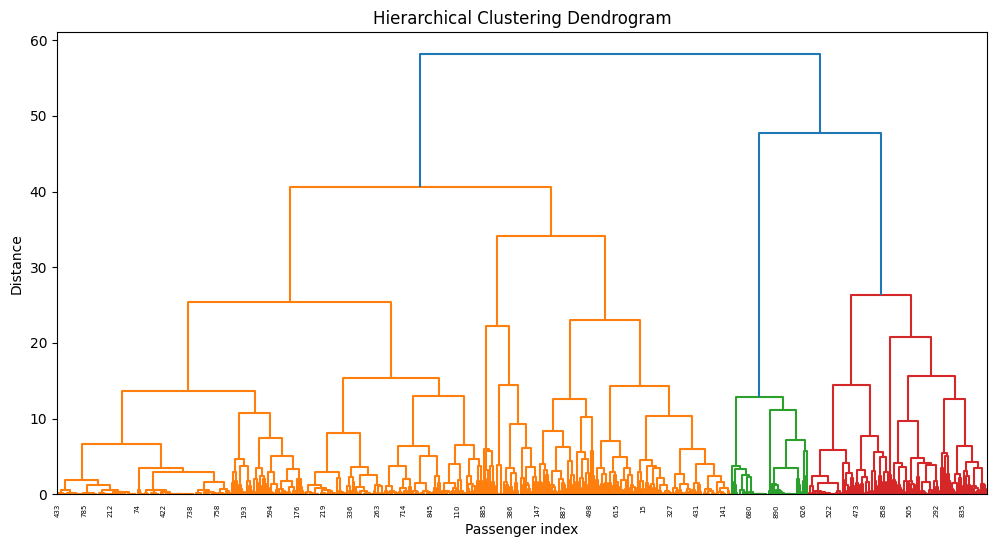

In [ ]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(12,6))
dendrogram(Z, truncate_mode='level', p=20)
plt.title("Hierarchical Clustering Dendrogram")
ax = plt.gca()
ax.set_xticks(ax.get_xticks()[::25])
plt.xlabel("Passenger index")
plt.ylabel("Distance")
plt.show()

This model helps us see how the clusters merge.

Next model I want to use is **DBSCAN**

*The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). There are two parameters to the algorithm, min_samples and eps, which define formally what we mean when we say dense. Higher min_samples or lower eps indicate higher density necessary to form a cluster.*

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1.5, min_samples=5)
train['Cluster_DB'] = db.fit_predict(X_scaled)

Points too far from others are labeled -1 - noise / outliers,

Cluster 0 (410) - largest dense group, probably the typical third-class passengers,

Medium clusters - wealthier passengers or families

And the last one will be **Gaussian mixture model**:

*A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.*

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=42)
train['Cluster_GMM'] = gmm.fit_predict(X_scaled)

Let's compare them:

In [ ]:
print(train['Cluster'].value_counts())       # K-Means
print(train['Cluster_H'].value_counts())     # Hierarchical
print(train['Cluster_DB'].value_counts())    # DBSCAN
print(train['Cluster_GMM'].value_counts())   # GMM

Cluster
1    518
3    170
0    126
2     77
Name: count, dtype: int64
Cluster_H
1    414
2    233
4    168
3     76
Name: count, dtype: int64
Cluster_DB
 0    410
 2    169
 7     87
-1     64
 1     63
 5     33
 3     32
 4     16
 8     12
 6      5
Name: count, dtype: int64
Cluster_GMM
1    455
0    189
3    170
2     77
Name: count, dtype: int64


We see the following **key differences**:

* K-Means and GMM: give similar cluster sizes, easy to interpret

* Hierarchical: slightly different distribution, but can show tree structure

* DBSCAN: very different, detects outliers, shows irregular small clusters


The **choice** of clustering method **depends on our goal**:

* For interpretability it's better to use K-Means or GMM

* For finding unusual passengers/outliers DBSCAN is great.

* For visualizing merges and hierarchy - Hierarchical.

We can also try to catch **survival patterns**:

In [ ]:
print(train.groupby('Cluster')['Survived'].mean())
print(train.groupby('Cluster_H')['Survived'].mean())
print(train.groupby('Cluster_DB')['Survived'].mean())
print(train.groupby('Cluster_GMM')['Survived'].mean())

Cluster
0    0.507937
1    0.295367
2    0.389610
3    0.558824
Name: Survived, dtype: float64
Cluster_H
1    0.176329
2    0.626609
3    0.394737
4    0.553571
Name: Survived, dtype: float64
Cluster_DB
-1    0.484375
 0    0.173171
 1    0.873016
 2    0.751479
 3    0.093750
 4    0.062500
 5    0.787879
 6    0.200000
 7    0.287356
 8    0.166667
Name: Survived, dtype: float64
Cluster_GMM
0    0.502646
1    0.268132
2    0.389610
3    0.558824
Name: Survived, dtype: float64


We see that for K-means cluster 0 has the highest survival rate - it aligns with the “women and children first” + first-class survival advantage.

Hierarchical clearly separates families (Cluster 2) with higher survival,it has  similar pattern to K-Means but highlights families more distinctly.

DBSCAN produces extreme survival clusters, it captures rare but meaningful groups (clusters 1, 2, 5 have high survival rate). What's interesting is that outliers (-1) mix features and have intermediate survival rate.It is very detailed but harder to summarize due to many small clusters

GMM is very similar to K-means.

Speaking of **quantitative quality metric**s:

In [ ]:
print("K-Means:", silhouette_score(X_scaled, train['Cluster']))
print("Hierarchical:", silhouette_score(X_scaled, train['Cluster_H']))
print("GMM:", silhouette_score(X_scaled, train['Cluster_GMM']))
mask = train['Cluster_DB'] != -1
print("DBSCAN:",silhouette_score(X_scaled[mask], train.loc[mask, 'Cluster_DB']))

K-Means: 0.3906763808822378
Hierarchical: 0.3409738631180014
GMM: 0.3429483102135112
DBSCAN: 0.37933161179712377


All scores are moderate (~0.34–0.39), which means **we don't have a perfect separation**, but it is expected - **Titanic data is noisy and overlapping** (people of different classes and ages may have similar features).

Again: **K-Means gives the cleanest clusters** for most passengers, but DBSCAN is more detailed but penalized because of small clusters and outliers

Lastly, let's create a **visual representation of clusters**:

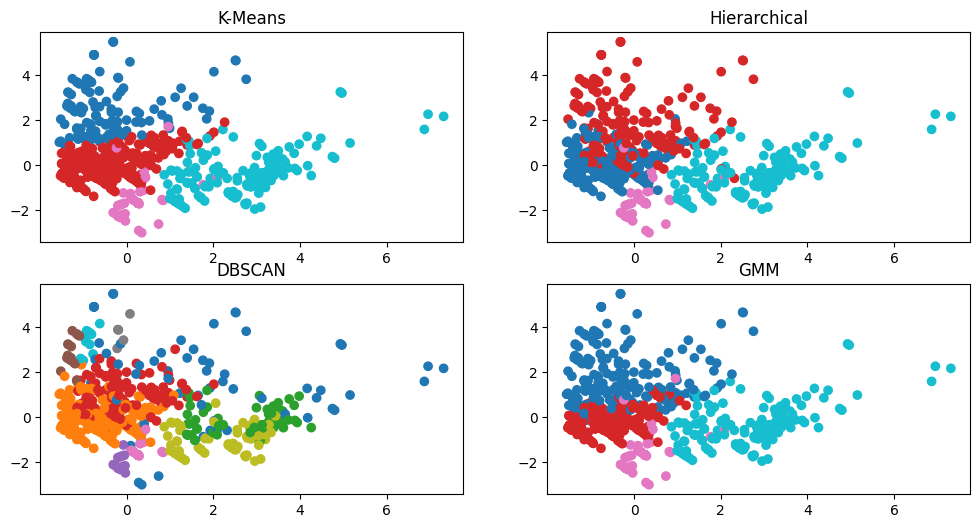

In [ ]:
from sklearn.decomposition import PCA

#PCA - Principal Component Analysis, reduces  dataset from 5 features to 2 principal components

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=train['Cluster'], cmap='tab10')
plt.title('K-Means')

plt.subplot(2,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=train['Cluster_H'], cmap='tab10')
plt.title('Hierarchical')

plt.subplot(2,2,3)
plt.scatter(X_pca[:,0], X_pca[:,1], c=train['Cluster_DB'], cmap='tab10')
plt.title('DBSCAN')

plt.subplot(2,2,4)
plt.scatter(X_pca[:,0], X_pca[:,1], c=train['Cluster_GMM'], cmap='tab10')
plt.title('GMM')

plt.show()